# Tarea Examen 2
### Ejercicio 2

## Jonathan Alexis Urrutia Anguiano 414011025

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import *
import matplotlib.animation as animation
from JSAnimation import IPython_display
%matplotlib inline

from pylab import *


Sea el Hamiltoniano $H$
$$ H = \frac12 (p^2_x + p^2_y) + \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$

y como no hay dependencia del tiempo y $V = V(\vec r)$, $H=E$ y es una coonstante de movimiento. Como $E=H =T-V$, indentificamos al potencial como
$$ V = \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$
si desprecian los términos en $x,y$ de tercer orden o más se obtiene 
$$ V \approx \frac12 (x^2+y^2), $$
que es un movimiento de oscilador armónico.

Ahora calculando las derivadas del hamiltoniano respecto a los momentos y a las posiciones es posible obtener la ec. de movimiento a resolver, que es

$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\-u_1(2v_1+1)\\ v^2_1 - v_1 - u^2_1\end{array}\right)
$$

con $x = u_1,\, u_2 = \dot x,\, v_1 =y$ y $v_2 = \dot y$

In [4]:
def ec_mov(x,t):  #x = [x,y,px,py]
    u1, v1, u2, v2 = x[0], x[1], x[2], x[3]
    return array([u2,v2, -u1*(2*v1+1), v1**2 -v1 - u1**2])

Y vamos a obtnener condiciones iniciales para que la Energía sea igual a un valor dado. Estas condiciones están pensadas para todas las preguntas del ejercicio. Nótese que si $x=0$, y definiendo $E_0 $ como la partel hamiltoniano que no depende de $p_x$, se puede calcular
$$ p_x = \sqrt{2(E-E_0)}$$

In [9]:
def condiciones(E):
    y =  0.1*rand()
    py = 0.15*(rand()-0.5)
    px_vir = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2    
    while px_vir < .0:
        y, py = 0.1*rand(), 0.15*(rand()-0.5)
        px_vir = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2
    px = sqrt(px_vir)
    return array([0.0, y, px, py])

 Además encontremos los puntos en los que $x=0$ pues nos será útil más adelante

In [10]:
def root_trayect(func, ptoi, ti, error=1e-5):
    while abs(ptoi[0]) > error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(func, ptoi, [ti, tip1], atol = 1e-9, rtol= 1e-9)
        ptoi = paso[-1]
    return ptoi

Observemos como se ve el comportamiernto dada una energía menor a un sexto.

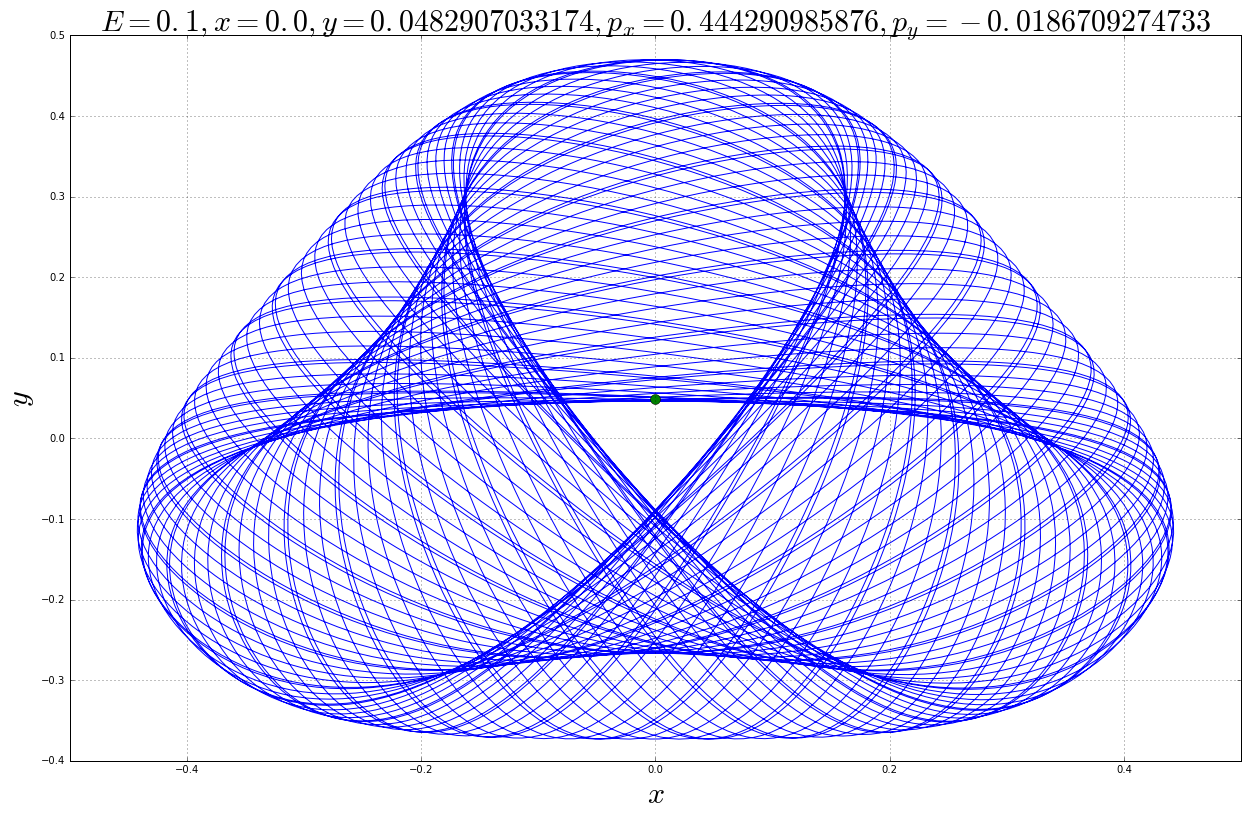

In [57]:
E = .1
t = linspace(0,500,10000)
ci = condiciones(E)

fig, ax = plt.subplots(figsize=(21, 13))
title(r'$E=%s, x=%s, y=%s, p_x=%s, p_y=%s$'%(str(E),str(ci[0]),str(ci[1]),str(ci[2]),str(ci[3])),fontsize = 30)
xlabel(r'$x$',fontsize=30),ylabel(r'$y$',fontsize = 30), grid(True)

sol = odeint(ec_mov, ci, t, mxstep=2000, atol=1e-9, rtol=1e-9)
plot(sol[:,0], sol[:,1])
plot(ci[0], ci[1], 'o', markersize = 10)
show()

Ahoa veremos cómo se ve el mapeo de Poincare, es decir, los puntos donde x es igual a cero

In [45]:
def mapeo_poincare(func, E, t): 
    p_ini = condiciones(E)
    
    sol = odeint(func, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    num = len(t)
    raices, puntos = zeros(num), zeros((num,4))
    j = 0
    for i in range(num-1):
        if sol[i][0]*sol[i+1][0] < 0.0:
            puntos[j] = root_trayect(func, sol[i], t[i], error=1e-5)
            j += 1
    puntos = puntos[0:j]
    return array([puntos,p_ini])

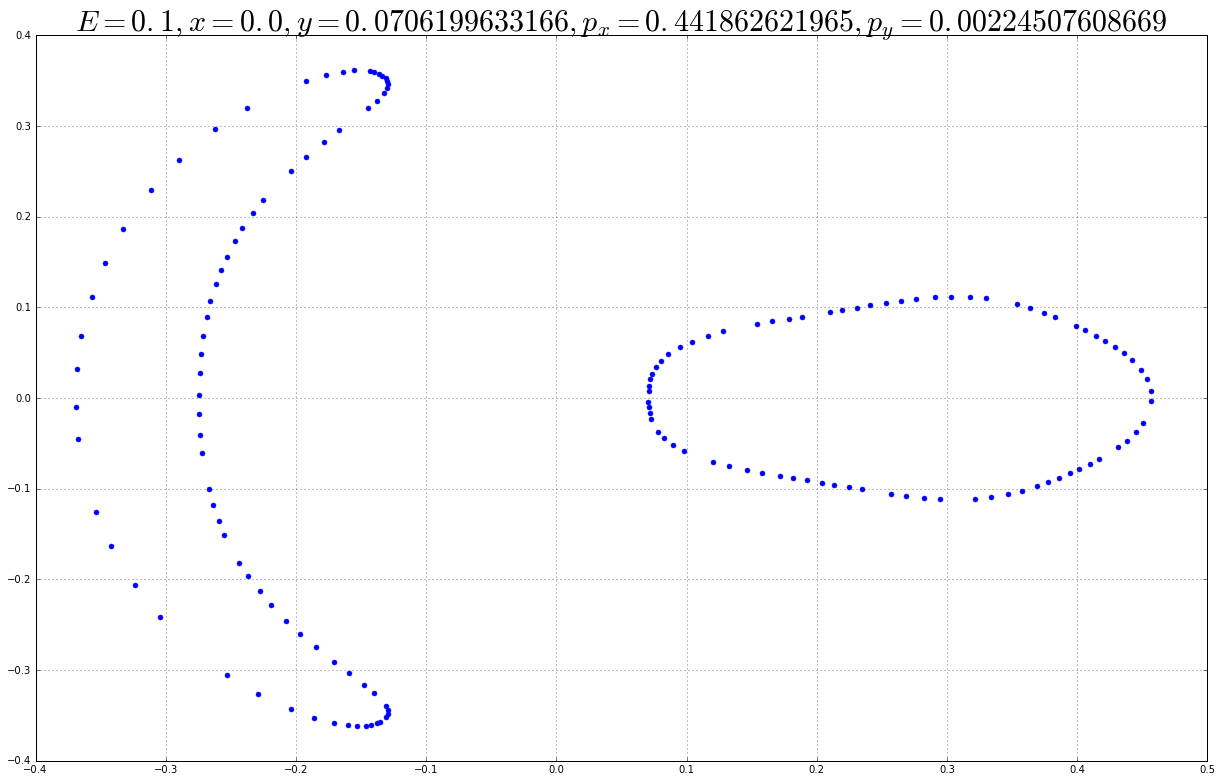

In [50]:
E = .1
t = linspace(0,500,10000)

fig, ax = plt.subplots(figsize=(21, 13))

puntos, ci = mapeo_poincare(ec_mov, E, t)
plot(puntos[:,1], puntos[:,3],'.',markersize=10)

title(r'$E=%s, x=%s, y=%s, p_x=%s, p_y=%s$'%(str(E),str(ci[0]),str(ci[1]),str(ci[2]),str(ci[3])),fontsize = 30),grid(True)
show()

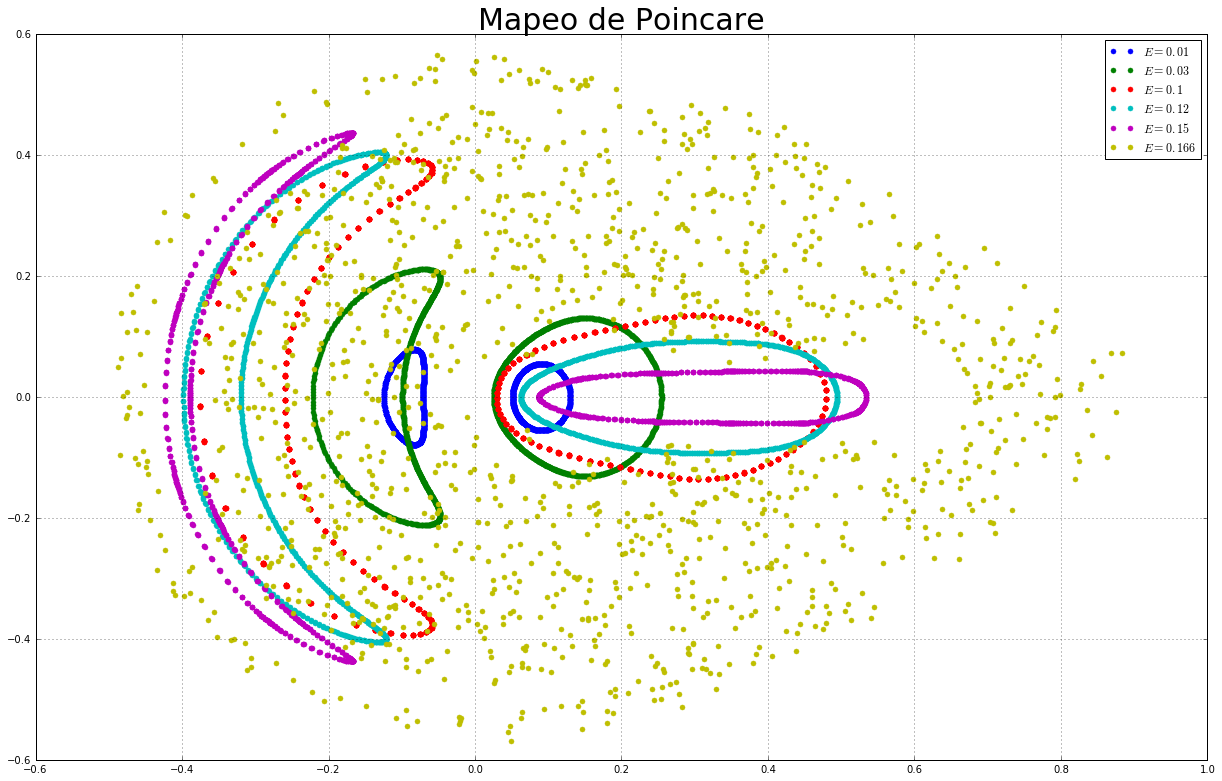

In [56]:
t = linspace(0, 5000, 15000)
E = array([0.01, 0.03, 0.1, 0.12, 0.15, 0.166])

fig, ax = plt.subplots(figsize=(21, 13))
title(r'Mapeo de Poincare',fontsize = 30), grid(True)
for e in E:
    puntos, ci = mapeo_poincare(ec_mov, e, t)
    plot(puntos[:,1], puntos[:,3],'.', markersize=10, label="$E=%s$"%(str(e)))

ax.legend(loc='upper right')
show()